In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/fars.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'fars'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [71]:
def fit_trees(tolerance = 0.001,max_nodes=1000):
    learning_rate=1
    max_depth=12
    bins=5
    lam=10

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=100
    elite_size = 10
    epoch= 2000
    gp_epoch= 1
    verbose = 1

    # gtgp.fit_fixed_number(X_train,y_train,total_size=total_size,elite_size = elite_size,
    #                       epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,max_nodes=max_nodes,verbose=verbose)
    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    # retrain_epoch= max(3000//sum([tree.numNode for tree in gtgp.stack]),1)
    retrain_epoch = 3

    alpha=0
    beta=1
    gammer=0

    verbose=1
    gtgp.lam = 10
    gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp


test_sses = []
test_accs = []

# tors = [0,1e-12,1e-4,1e-2]
tors = [1e-5]
for t in tors:
    test_sse = []
    test_acc = []
    for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
        y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

        gtgp = fit_trees(tolerance=t,max_nodes=500)
        num_trees,depth,num_nodes = gtgp.print_model()
        test_sse.append(gtgp.test_sse)
        test_acc.append(gtgp.test_acc)
    min_epoch = min([len(t) for t in test_acc])
    test_sses.append(test_sse)
    test_accs.append(test_acc)

9 27 1
18 54 2
26 78 3
34 102 4
41 123 5
47 141 6
56 168 7
64 192 8
73 219 9
76 228 10
84 252 11
89 267 12
96 288 13
99 297 14
101 303 15
102 306 16
107 321 17
111 333 18
117 351 19
122 366 20
127 381 21
131 393 22
132 396 23
133 399 24
138 414 25
143 429 26
144 432 27
145 435 28
149 447 29
150 450 30
154 462 31
156 468 32
157 471 33
160 480 34
163 489 35
167 501 36
168 504 37
172 516 38
172 516 39
172 516 40
175 525 41
180 540 42
182 546 43
182 546 44
187 561 45
187 561 46
188 564 47
188 564 48
188 564 49
191 573 50
191 573 51
192 576 52
192 576 53
194 582 54
194 582 55
194 582 56
194 582 57
194 582 58
194 582 59
194 582 60
195 585 61
197 591 62
199 597 63
201 603 64
202 606 65
202 606 66
203 609 67
204 612 68
205 615 69
205 615 70
205 615 71
205 615 72
205 615 73
207 621 74
208 624 75
210 630 76
210 630 77
214 642 78
216 648 79
217 651 80
217 651 81
218 654 82
218 654 83
219 657 84
219 657 85
219 657 86
219 657 87
219 657 88
219 657 89
222 666 90
224 672 91
225 675 92
226 678 93
226 

KeyboardInterrupt: 

In [47]:
[len(t) for t in test_sses]

[30, 30, 30, 30]

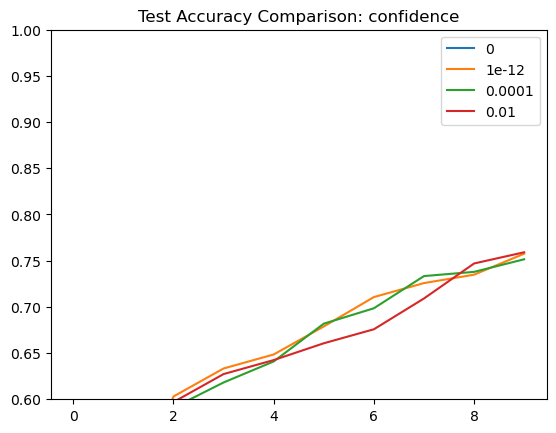

In [60]:
length = 10
test_acc_avgs = []
for t in test_accs:
    avg = []
    # length = min([len(i) for i in t])
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_acc_avgs.append(avg)

for i in range(len(test_acc_avgs)):
    plt.plot(test_acc_avgs[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')
plt.title("Test Accuracy Comparison: "+dataset)
plt.ylim(0.6,1)
plt.legend(tors[:len(test_sses)])
plt.show()


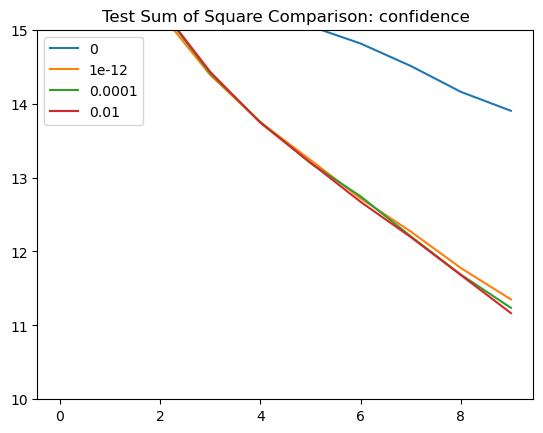

In [61]:
length = 10
test_sse_avg = []
for t in test_sses:
    avg = []
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_sse_avg.append(avg)

for i in range(len(test_sse_avg)):
    plt.plot(test_sse_avg[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')

plt.title("Test SSE: "+dataset)
plt.ylim(10,15)
plt.title("Test Sum of Square Comparison: "+dataset)
plt.legend(tors[:len(test_sses)])
plt.show()
